<a href="https://colab.research.google.com/github/alxogm/HIGI2022/blob/main/python/Fit_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import stats


In [163]:
#Valores verdaderos de la pendiente y la ordenada al origen
m_true = -0.9594
b_true = 4.294

In [154]:
#Leemos los datos
data=np.load("line.npy")
x=data[0]
y=data[1]
yerr=data[2]

#x,y,yerr=np.load("line.npy")

In [155]:
a_fit, b_fit = np.polyfit(x,y, 1)

-0.9581362220081967 4.274384273855281


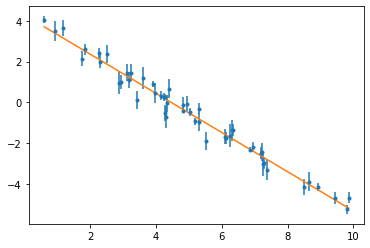

In [156]:
plt.errorbar(x,y,yerr, fmt='.')
plt.plot(x,a_fit*x+b_fit)
print(a_fit,b_fit)

In [157]:
a_reg,b_reg, r_value, p_value, std_err = stats.linregress(x,y)

-0.9581362220081964 4.27438427385528


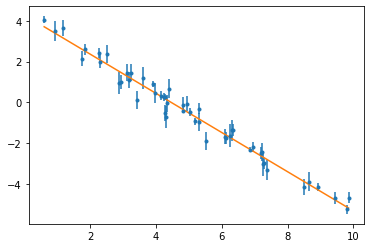

In [158]:
plt.errorbar(x,y,yerr, fmt='.')
plt.plot(x,a_reg*x+b_reg)
print(a_reg,b_reg)

In [165]:

def chi2(params):
     a=params[0]
     b=params[1] 
     ymodel=a*x+b
     chi2=0.5*np.sum((y-ymodel)**2/yerr**2)
     return  chi2

In [166]:
res = minimize(chi2, x0=[-0,0], options={'disp': True})
a_op,b_op=res.x
print(a_op,b_op)

Optimization terminated successfully.
         Current function value: 27.463454
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6
-0.9716812748413178 4.399210573461103


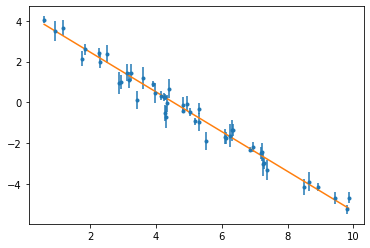

In [167]:
plt.errorbar(x,y,yerr, fmt='.')
plt.plot(x,a_op*x+b_op)

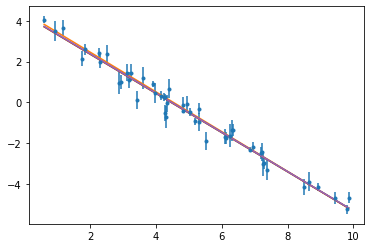

In [162]:
plt.errorbar(x,y,yerr, fmt='.')
plt.plot(x,a_op*x+b_op)
plt.plot(x,a_fit*x+b_fit)
plt.plot(x,a_reg*x+b_reg)
plt.plot(x,m_true*x+b_true)